<a href="https://colab.research.google.com/github/Angie-O/HypothesisTesting-using-Python----Bank-and-Credit-card-data/blob/main/Data%20Preprocessing%20and%20Hypothesis%20Testing-Bank%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

To understand Data Preprocessing and Hypothesis Testing, we will go through data about a bank that carried out a campaign hoping to improve credit card usage and sales.

We will work on 2 different hypothesis tests with a significance value of 0.05 from the data to better understand Hypothesis testing.

## Success Metrics

1. Data preprocessing
  - Importing Libraries and data
  - Understanding data
  - Cleaning data
  - Encoding
2. Define Hypothesis
3. Identify test statistic
4. Analyze for evidence against Null Hupothesis(p-value)
5. Communicate findings

## Importing Libraries

In [62]:
import pandas as pd
# for data manipulation and analysis

import scipy.stats as stats
# scipy statistical module for statistical hypothesis testing

import seaborn as sns
# for plotting visualizations

from sklearn.preprocessing import OneHotEncoder
# for encoding

## Importing Data

In [63]:
# importing the data to customer_data dataFrame
customer_data = pd.read_csv("/bank_data.csv")

# previewing first 5 records of the data
customer_data.head(5)

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
0,70,Male,4.0,1,Single,1,57.0,52,57.2,49.2
1,121,Female,4.0,2,Single,3,68.0,59,64.9,63.6
2,86,Male,4.0,3,Single,1,44.0,33,36.3,64.8
3,141,Male,4.0,3,Single,3,63.0,44,48.4,56.4
4,172,NaN,NaN,2,NaN,2,NaN,52,NaN,NaN




---




## Understanding Data

In [64]:
# understand data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   custid                       202 non-null    int64  
 1   sex                          201 non-null    object 
 2   channel                      201 non-null    float64
 3   region                       202 non-null    int64  
 4   marital_status               201 non-null    object 
 5   segment                      202 non-null    int64  
 6   usage_before_campaign        201 non-null    float64
 7   usage_after_campaign_month1  202 non-null    int64  
 8   usage_after_campaign_month2  201 non-null    float64
 9   latest_month_usage           201 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 15.9+ KB


**OBSERVATIONS;**
* Data has 202 rows, 10 columns with different 
data types.

* Some columns have null values.

In [65]:
# summary statistics
customer_data.describe()

,custid,channel,region,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
count,202.000000,201.000000,202.000000,202.000000,201.000000,202.000000,201.000000,201.000000
mean,100.064356,3.427861,2.049505,2.029703,52.258706,52.762376,58.138308,63.122388
std,57.785336,1.037314,0.724500,0.690453,10.248060,9.448102,10.578798,11.210903
min,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,34.100000,39.600000
25%,50.250000,3.000000,2.000000,2.000000,44.000000,46.000000,50.600000,54.000000
50%,99.500000,4.000000,2.000000,2.000000,50.000000,54.000000,59.400000,62.400000
75%,149.750000,4.000000,3.000000,2.750000,60.000000,60.000000,66.000000,70.800000
max,200.000000,4.000000,3.000000,3.000000,76.000000,67.000000,85.200000,90.000000


In [66]:
# Understand the shape of the dataframe - Rows and Columns
customer_data.shape

(202, 10)

**OBSERVATION:**
* Data has 202 rows and 10 columns

In [67]:
# list dataset's columns
customer_data.columns

Index(['custid', 'sex', 'channel', 'region', 'marital_status', 'segment',
       'usage_before_campaign', 'usage_after_campaign_month1',
       'usage_after_campaign_month2', 'latest_month_usage'],
      dtype='object')



---



## Data Cleaning

### Duplicates

In [68]:
# check for duplicates
customer_data.duplicated().sum()

2

In [69]:
# show duplicates
customer_data[customer_data.duplicated()]

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
19,75,Male,4.0,2,Single,3,60.0,46,50.6,61.2
23,38,Male,3.0,1,Single,2,45.0,57,62.7,60.0


In [70]:
# show duplicates with their original values
customer_data[customer_data.duplicated(keep = False)]

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
10,75,Male,4.0,2,Single,3,60.0,46,50.6,61.2
14,38,Male,3.0,1,Single,2,45.0,57,62.7,60.0
19,75,Male,4.0,2,Single,3,60.0,46,50.6,61.2
23,38,Male,3.0,1,Single,2,45.0,57,62.7,60.0


In [71]:
# drop duplicates
customer_data.drop_duplicates(inplace = True)

In [72]:
# check for duplicates to confirm removal
customer_data.duplicated().sum()

0

**OBSERVATION:**
* Dataset had 2 duplicates that we checked for and dropped



---



### Outliers

<Axes: >

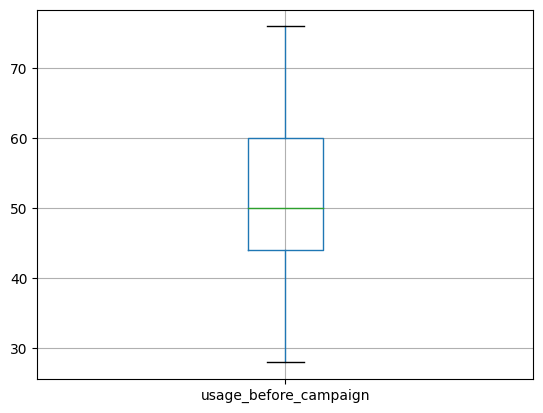

In [73]:
# Check for outliers in the 'usage_before_campaign' variable to be used for hypothesis testing
customer_data.boxplot(column =['usage_before_campaign'])

<Axes: >

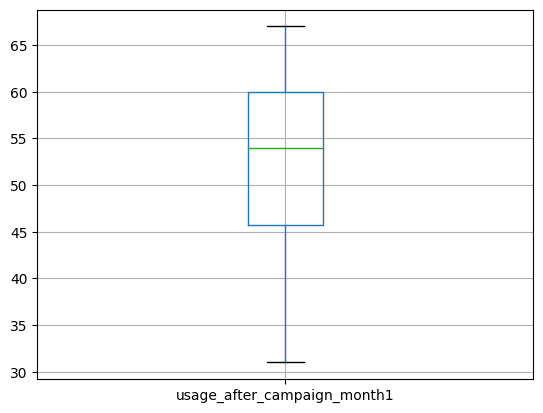

In [74]:
# Check for outliers in the 'usage_after_campaign_month1' variable to be used for hypothesis testing
customer_data.boxplot(column =['usage_after_campaign_month1'])


**OBSERVATION:**
- There are no outliers in the 2 variables we are to compare in our hypothesis test.



---



### Null/Missing Values

In [75]:
# check for missing values per column
customer_data.isnull().sum()

custid                         0
sex                            1
channel                        1
region                         0
marital_status                 1
segment                        0
usage_before_campaign          1
usage_after_campaign_month1    0
usage_after_campaign_month2    1
latest_month_usage             1
dtype: int64

In [76]:
# see rows with nulls
customer_data[customer_data.isnull().any(axis = 1)]

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
4,172,NaN,NaN,2,NaN,2,NaN,52,NaN,NaN


In [77]:
# drop missing values
customer_data.dropna(inplace = True)

# check for missing values again to confirm their removal
customer_data.isna().sum()

custid                         0
sex                            0
channel                        0
region                         0
marital_status                 0
segment                        0
usage_before_campaign          0
usage_after_campaign_month1    0
usage_after_campaign_month2    0
latest_month_usage             0
dtype: int64

**OBSERVATION:**
- Only one observation had missing values in different columns so it was dropped.



---



## Encoding

In [78]:
# Specifically, we need to reformat the marrital_status variable into numeric dummies.
married = pd.get_dummies(customer_data['marital_status'],drop_first=True)

# Previewing the numerical dummies
married.tail()

,Single
197,0
198,1
199,0
200,1
201,0


In [79]:
# Changing the original marital_status variable to the new(married) variable with numerical dummies
customer_data['marital_status'] = married

# Previewing data
customer_data.tail()

,custid,sex,channel,region,marital_status,segment,usage_before_campaign,usage_after_campaign_month1,usage_after_campaign_month2,latest_month_usage
197,31,Female,2.0,2,0,1,55.0,59,64.9,62.4
198,145,Female,4.0,2,1,3,42.0,46,50.6,45.6
199,187,Female,4.0,2,0,1,57.0,41,45.1,68.4
200,118,Female,4.0,2,1,1,55.0,62,68.2,69.6
201,137,Female,4.0,3,0,2,63.0,65,71.5,78.0


**OBSERVATION:**
- Marital_status variable that previously had Single and Married categories has been converted to numerical dummies with 0 representing single and 1 representing married.

# Hypothesis 1

## Formulation of Hypothesis

**Null Hypothesis;** There was no change in credit card usage after the campaign.

**Alternative Hypothesis;** There was change in credit card usage after the campaign.

## Identify Test Statistic

Assuming Normality, use a Two sample(Paired) t test(Dependent) since we are Comparing 2 Dependent variables(*usage_before_campaign*) and (*usage_after_campaign_month1*)

## Analyze for evidence against Null Hypothesis

Using the scipy_stats module to calculate hypothesis using ttest.
Significance value = 0.005

In [80]:
# dependent ttest using scipy.stats module
stats.ttest_rel(a = customer_data.usage_before_campaign, b = customer_data.usage_after_campaign_month1)

TtestResult(statistic=-0.8280370466338398, pvalue=0.40864646025743323, df=198)

## Communicate Findings

The results of our t-test indicate that there is NO significant difference between credit card usage before and after the campaign.

P value of 0.4086 is large, greater than significance level of 0.05.


Therefore, we **Fail to Reject Null Hypothesis** and conclude that there was no  significant difference between the two periods.

# Hypothesis 2

## Formulation of Hypothesis

**Null Hypothesis:** There was no relationship between marital status and spend before the campaign

**Alternative Hypothesis:** Marital status had an effect on spend before the campaign

## Identify Test Statistic

Assuming Normality, use a Two sample t test(Independent) since we are Comparing 2 Independent categories(*single*) and (*married*)

## Analyze for evidence against Null Hypothesis

Using the scipy_stats module to calculate hypothesis using ttest.
Significance value = 0.005

Since we are comparing spending for singles and married before the campaign, we will put the 2 values in separate variables that we will use for hypothesis testing.

In [81]:
# Spend for singles before the campaign
singles_spend_before = customer_data.usage_before_campaign[customer_data.marital_status == 0]

# preview spend for singles before the campaign
singles_spend_before.head()

7     34.0
12    73.0
17    57.0
24    50.0
29    47.0
Name: usage_before_campaign, dtype: float64

In [82]:
# Spend for married people before the campaign
married_spend_before = customer_data.usage_before_campaign[customer_data.marital_status == 1]

# preview spend for married people before the campaign
married_spend_before.head()

0    57.0
1    68.0
2    44.0
3    63.0
5    44.0
Name: usage_before_campaign, dtype: float64

In [83]:
# independent ttest using scipy.stats module
stats.ttest_ind(a = singles_spend_before, b = married_spend_before, equal_var = False)

Ttest_indResult(statistic=1.7325581970793966, pvalue=0.08516585216976205)

## Communicate Findings

The results of our t-test indicate that there was no relationship between marital status and spend before the campaign.

P value of 0.0852 is large, greater than significance level of 0.05.

Therefore, we **Fail to Reject Null Hypothesis** and conclude that there was no relationship between marital status and spend before the campaign.